In [1]:
import os
import squarify
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = {
    'Group': ['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
    'Job_Nature': ['Closely', 'Closely', 'Closely', 'Closely', 'Somewhat', 'Somewhat', 'Somewhat', 'Somewhat', 'Unrelated'] * 2,
    'Industry': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'Others'] * 2,
    'Count': [83, 53, 47, 12, 30, 23, 12, 8, 21, 23, 9, 32, 15, 3, 7, 22, 11, 28],
    'Median_Salary': [3150, 3300, 2650, 2400, 4100, 3400, 2800, 2300, 2900, 3000, 3100, 2600, 2400, 3900, 3150, 2600, 2200, 1900]
}

In [3]:
df = pd.DataFrame(data)

# Convert 'JobNature' and 'Group' to categorical for correct sorting in plots
df['Job_Nature'] = pd.Categorical(df['Job_Nature'], categories=['Closely', 'Somewhat', 'Unrelated'], ordered=True)
df['Group'] = pd.Categorical(df['Group'], categories=['X', 'Y'], ordered=False)

In [4]:
df

,Group,Job_Nature,Industry,Count,Median_Salary
0,X,Closely,A,83,3150
1,X,Closely,B,53,3300
2,X,Closely,C,47,2650
3,X,Closely,D,12,2400
4,X,Somewhat,E,30,4100
5,X,Somewhat,F,23,3400
6,X,Somewhat,G,12,2800
7,X,Somewhat,H,8,2300
8,X,Unrelated,Others,21,2900
9,Y,Closely,A,23,3000


In [5]:
# Directory to save figures
save_dir = "figures/visualisation"
os.makedirs(save_dir, exist_ok=True)

/var/folders/3f/xhw3kd5d62v0s4_2fvl3_7480000gn/T/ipykernel_21364/4018272817.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agg = df.groupby(['Job_Nature', 'Group'], as_index=False)['Count'].sum()


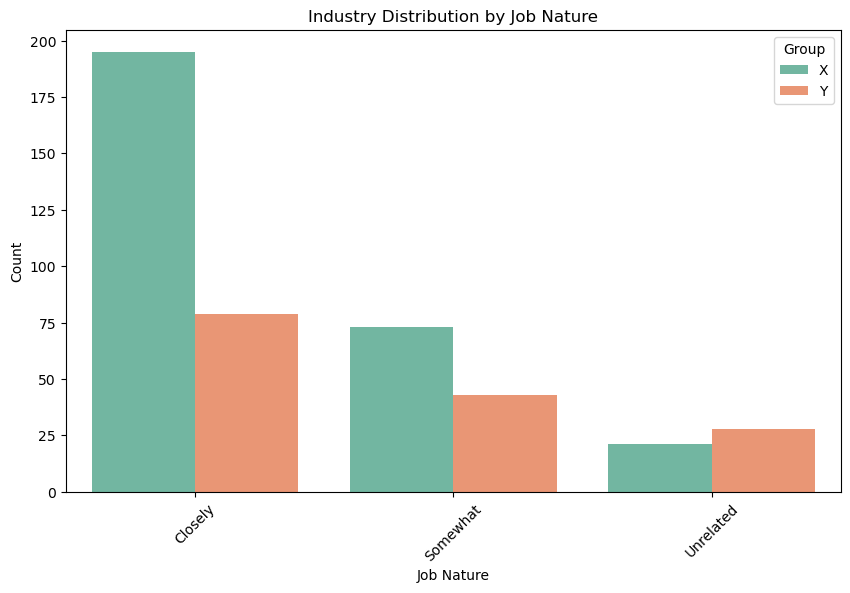

In [6]:
# Aggregate counts across each job nature category and group
df_agg = df.groupby(['Job_Nature', 'Group'], as_index=False)['Count'].sum()

# Grouped Bar Chart for Industry Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Job_Nature', y='Count', hue='Group', data=df_agg, palette='Set2', errorbar=None)
plt.title('Industry Distribution by Job Nature')
plt.xlabel('Job Nature')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Group')

plt.savefig(os.path.join(save_dir, 'Industry_Distribution_by_Job_Nature.png'))

/var/folders/3f/xhw3kd5d62v0s4_2fvl3_7480000gn/T/ipykernel_21364/1079570078.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_x_counts = group_x.groupby('Job_Nature')['Count'].sum()
/var/folders/3f/xhw3kd5d62v0s4_2fvl3_7480000gn/T/ipykernel_21364/1079570078.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_y_counts = group_y.groupby('Job_Nature')['Count'].sum()


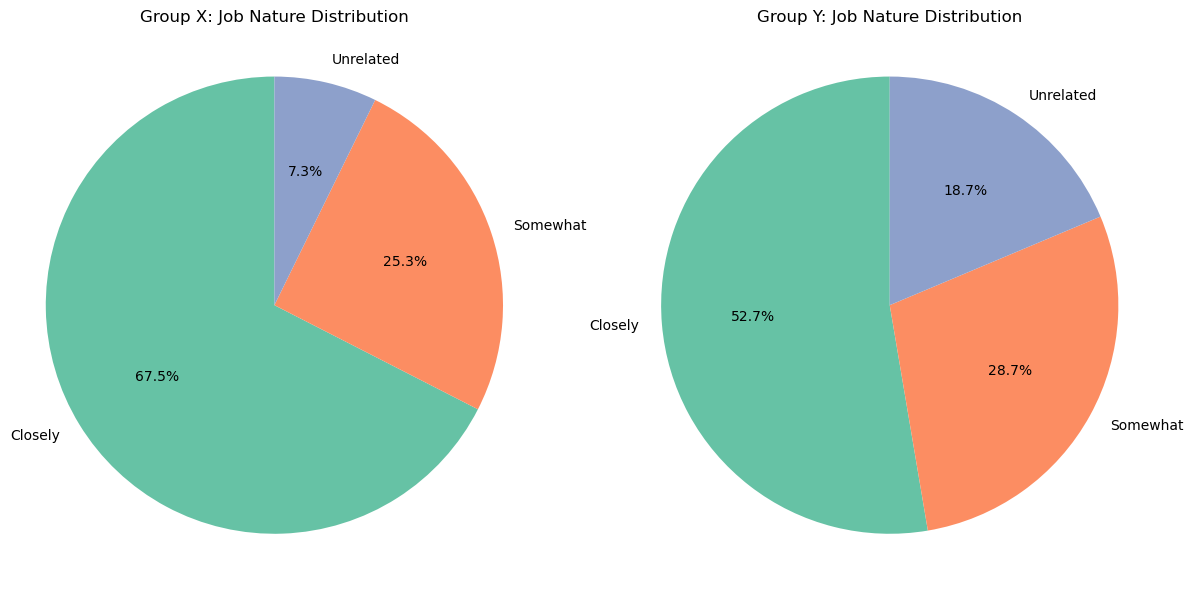

In [7]:
# Pie Charts for Proportion in Related vs Unrelated Jobs
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Group X
group_x = df[df['Group'] == 'X']
group_x_counts = group_x.groupby('Job_Nature')['Count'].sum()
axes[0].pie(group_x_counts, labels=group_x_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
axes[0].set_title('Group X: Job Nature Distribution')
axes[0].axis('equal')

# Group Y
group_y = df[df['Group'] == 'Y']
group_y_counts = group_y.groupby('Job_Nature')['Count'].sum()
axes[1].pie(group_y_counts, labels=group_y_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
axes[1].set_title('Group Y: Job Nature Distribution')
axes[1].axis('equal')

plt.tight_layout()

plt.savefig(os.path.join(save_dir, 'Job_Nature_Distribution_of_Groups.png'))

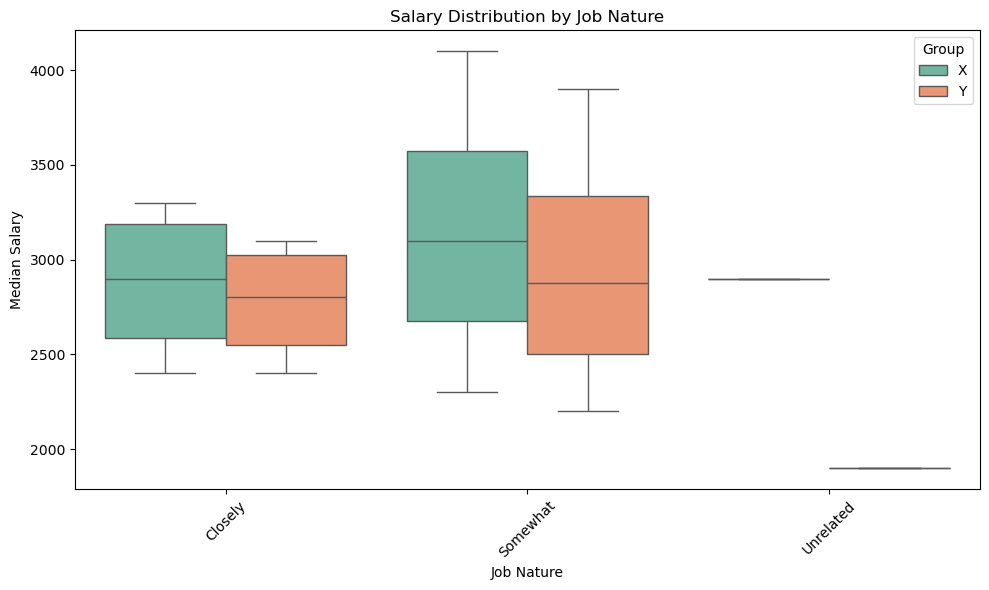

In [8]:
# Box Plot for Salary Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Job_Nature', y='Median_Salary', hue='Group', data=df, palette='Set2')
plt.title('Salary Distribution by Job Nature')
plt.xlabel('Job Nature')
plt.ylabel('Median Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Group')
plt.savefig(os.path.join(save_dir, 'Salary_Distribution_by_Job_Nature.png'))

In [9]:
# Pivot the dataframe to have Group as columns and Job_Nature as index
# Take mean of median salary for each combination of (Group, Job Nature)
df_pivot = df.pivot_table(index='Job_Nature', columns='Group', values='Median_Salary', aggfunc='mean')

df_pivot

/var/folders/3f/xhw3kd5d62v0s4_2fvl3_7480000gn/T/ipykernel_21364/2470580138.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = df.pivot_table(index='Job_Nature', columns='Group', values='Median_Salary', aggfunc='mean')


Group,X,Y
Job_Nature,,
Closely,2875.0,2775.0
Somewhat,3150.0,2962.5
Unrelated,2900.0,1900.0


<Figure size 1000x600 with 0 Axes>

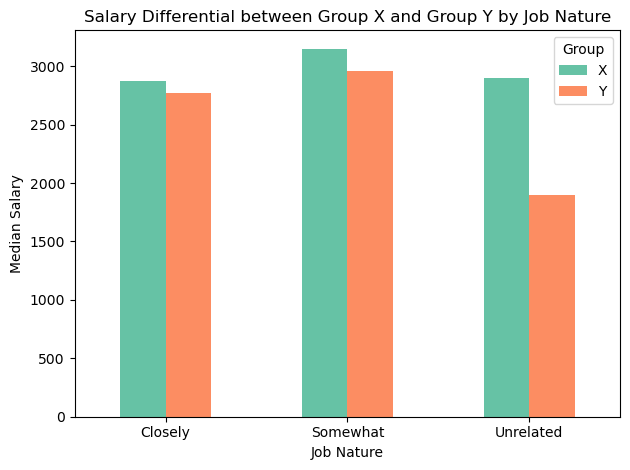

In [10]:
# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
ax = df_pivot.plot(kind='bar', stacked=False, color=sns.color_palette('Set2'))
plt.title('Salary Differential between Group X and Group Y by Job Nature')
plt.xlabel('Job Nature')
plt.ylabel('Median Salary')
plt.xticks(rotation=0)
plt.legend(title='Group')
plt.tight_layout()

plt.savefig(os.path.join(save_dir, 'Salary_Differential_between_Groups.png'))